# Skimage

scikit-image представляет собой пакет Python для обработки изображений, который работает с numpy массивами. Пакет импортируется как skimage.

In [41]:
import skimage

Большинство функций skimage находятся в подмодулях: color, data, draw, exposure, feature, filters,
future, graph, io, measure, metrics, morphology, registration, restoration, segmentation, transform,
util, viewer. 

skimage.data подмодуль предоставляет набор функций , возвращающих пример изображения, которые могут быть использованы.

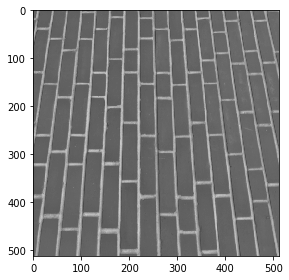

In [343]:
from skimage import data
image = data.brick()
io.imshow(image) 
io.show()

В scikit-image изображения представлены в виде массивов NumPy, например, двумерных массивов для двухмерных изображений в градациях серого. Цветное изображение - это массив NumPy с дополнительным конечным измерением для каналов.

In [110]:
type(image)

numpy.ndarray

Получение геометрии изображения и количества пикселей.

In [111]:
image.shape

(90, 90)

In [112]:
image.size

8100

Также можно загружать свои собственные изображения в виде массивов NumPy из файлов изображений, используя skimage.io.imread().

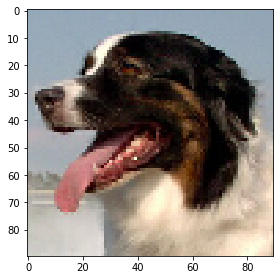

In [344]:
from skimage import io
egImage = ("https://upload.wikimedia.org/wikipedia/commons/7/7d/Dog_face.png")
image2 = io.imread(egImage)
io.imshow(image2) 
io.show()

Для изображений можно получить информацию о значениях яркости.

In [6]:
image2.min(), image2.max()

(0, 255)

Массивы NumPy, представляющие изображения, могут быть разных целочисленных или числовых 
типов с плавающей запятой.

In [7]:
image.mean()

111.45535659790039

Индексирование NumPy можно использовать как для просмотра значений пикселей, так и для их изменения:

In [116]:
image[40, 40]

97

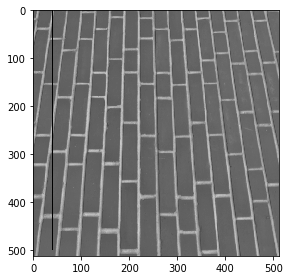

In [345]:
image = data.brick()
for a in range(500):
    image[a, 40] = 0
io.imshow(image) 
io.show()

Маскирование (индексация с помощью булевых масок).

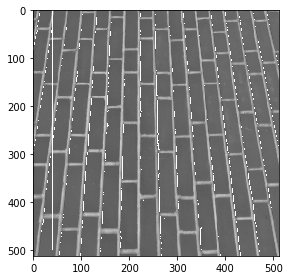

In [346]:
mask = image < 87
image[mask] = 255
io.imshow(image) 
io.show()
#Установливает значение "белый" (255) для пикселей, в которых маска истинна

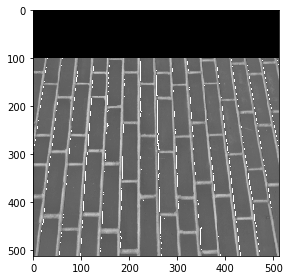

In [128]:
image[:50] = 0
io.imshow(image)
io.show()
# Установить для первых десяти строк значение "черный" (0)

Маски очень полезны, когда вам нужно выбрать набор пикселей для выполнения манипуляций. Маской может быть любой логический массив той же формы, что и изображение. Это можно использовать для определения интересующей области, например, круг.

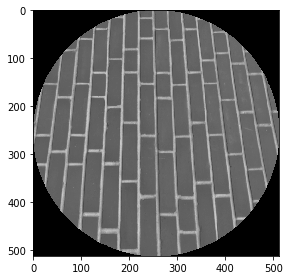

In [347]:
image = data.brick()
import numpy as np
nrows, ncols = image.shape
row, col = np.ogrid[:nrows, :ncols]
cnt_row, cnt_col = nrows / 2, ncols / 2
outer_disk_mask = ((row - cnt_row)**2 + (col - cnt_col)**2 >
                   (nrows / 2)**2)
image[outer_disk_mask] = 0
io.imshow(image) 
io.show()

Логические операции из NumPy можно использовать для определения еще более сложных масок.

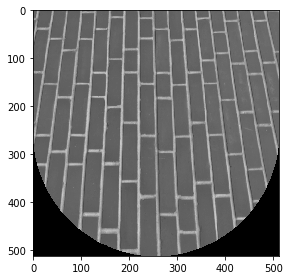

In [348]:
lower_half = row > cnt_row
lower_half_disk = np.logical_and(lower_half, outer_disk_mask)
image = data.brick()
image[lower_half_disk] = 0
io.imshow(image) 
io.show()

Здесь показанно, что наше изображение размером 90 на 90 пикселей с тремя каналами (красным, зеленым и синим).

In [129]:
image2.shape

(90, 90, 3)

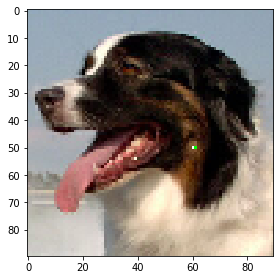

In [350]:
image2 = io.imread(egImage)

# установливаем пиксель в (50-ой строке, 61-ом столбец) на "белый"
image2[50, 60] = 255
# установливаем пиксель в (50-ой строке, 61-ом столбец) на "зеленый"
image2[50, 61] = [0, 255, 0]  # [красный, зеленый, синий]
io.imshow(image2) 
io.show()

Мы также можем использовать двумерные булевы маски для двумерных многоканальных изображений, как мы это сделали с черно-белым изображением выше.

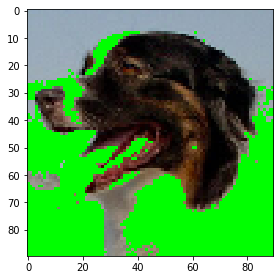

In [351]:
reddish = image2[:, :, 0] > 160
image2[reddish] = [0, 255, 0]
io.imshow(image2)
io.show()

Поскольку scikit-image представляет изображения с использованием массивов NumPy,мы можем обратится только к элементу из заданного диапазона.

Маркировка осей может существенно повлиять на скорость выполнения операций. Это связано с тем, что современные процессоры никогда не извлекают из памяти только один элемент, а скорее целую часть смежных элементов. Следовательно, обработка элементов, находящихся рядом друг с другом в памяти, происходит быстрее, чем их обработка, когда они разбросаны, даже если количество операций одинаковое.

In [122]:
def in_order_multiply(arr, scalar):
    for plane in list(range(arr.shape[0])):
        arr[plane, :, :] *= scalar

def out_of_order_multiply(arr, scalar):
    for plane in list(range(arr.shape[2])):
        arr[:, :, plane] *= scalar

import time
im3d = np.random.rand(100, 1024, 1024)
t0 = time.time(); x = in_order_multiply(im3d, 5); t1 = time.time()
print("%.2f секунд" % (t1 - t0))  

s0 = time.time(); x = out_of_order_multiply(im3d, 5); s1 = time.time()
print("%.2f секунд" % (s1 - s0))  

print("Скорость больше в %.1fраз" % ((s1 - s0) / (t1 - t0)))  


0.11 секунд
1.61 секунд
Скорость больше в 14.9раз


Можно сделать вывод что, при использовании вложенных циклов последнее / крайнее правое измерение массива должно находиться в самом внутреннем цикле вычисления.

## Типы данных изображения и их значение

В skimage, изображения - это просто массивы numpy , которые поддерживают различные типы данных.

Функции в skimage спроектированы так, что они принимают любой из этих типов данных: uint8, uint16, uint32, float, int8, int16, int32. Но для эффективности могут возвращать изображение другого типа. Если нужен конкретный тип данных, skimage предоставляет служебные функции, которые преобразуют и правильно масштабируют интенсивность изображения.

In [132]:
from skimage.util import img_as_float
image = np.arange(12, 70, 21, dtype=np.uint8)

print(image.astype(float))

print(img_as_float(image))


[12. 33. 54.]
[0.04705882 0.12941176 0.21176471]


Также есть функции img_as_ubyte, img_as_uint, img_as_int. Эти функции преобразуют изображения в желаемый dtype и правильно масштабируют их значения. Эти преобразования могут привести к потере точности!

### RGB и BRG

Цветные изображения в skimage имеют 3 измерения: ширину, высоту и цвет. RGB и BGR используют одно и то же цветовое пространство, за исключением того, что порядок цветов обратный.

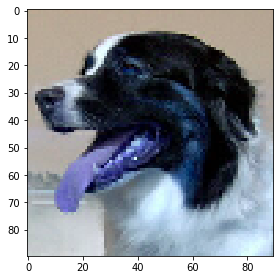

In [352]:
# Следующая инструкция эффективно меняет порядок цветов, не затрагивая строки и столбцы.
image2 = io.imread(egImage)
image3 = image2[:, :, ::-1]
io.imshow(image3)
io.show()

### Отрицательные значения

Отрицательные значения обрезаются до 0 при преобразовании в беззнаковые типы. (Отрицательные значения сохраняются при преобразовании между другими типами данных.) Чтобы предотвратить такое поведение отсечения, следует заранее изменить масштаб изображения.

In [354]:
from skimage.util import img_as_ubyte
from skimage import exposure
image = exposure.rescale_intensity(image2, out_range=(0, 2**31 - 1))
img_uint8 = img_as_ubyte(image2)

## Визуализация данных

Визуализация данных занимает важное место в обработке изображений. Данные могут быть простым уникальным 2D-изображением или более сложным с многомерными аспектами: 3D в пространстве, временной интервал, несколько каналов.

Следовательно, стратегия визуализации будет зависеть от сложности данных, и для этой цели можно использовать ряд инструментов, не предусмотренных scikit-image. Хоть scikit-image и предоставляет средства просмотра, но лучше выбирать более мощные пакеты (matplotlib, plotly, mayavi, Napari).

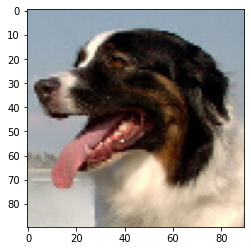

In [292]:
#matplotlib
from matplotlib import pyplot as plt 
import matplotlib.cm as cm
image2 = io.imread(egImage)
plt.imshow(image2, cmap = cm.gray)
plt.show()

# Регулировка изображения

Большинство функций для управления цветовыми каналами находятся в подмодуле skimage.color. skimage.color предоставляет служебные функции для преобразования изображений в разные цветовые пространства и обратно. Массивы целочисленного типа можно преобразовать в тип с плавающей запятой с помощью операции преобразования.

In [54]:
from skimage.color import rgb2hsv
#ярко - насыщенный красный
red_pixel_rgb = np.array([[[255, 0, 0]]], dtype=np.uint8)
rgb2hsv(red_pixel_rgb)

array([[[0., 1., 1.]]])

In [55]:
#слабо насыщенный розовый
pink_pixel_rgb = np.array([[[255, 100, 255]]], dtype=np.uint8)
rgb2hsv(pink_pixel_rgb)

array([[[0.83333333, 0.60784314, 1.        ]]])

Преобразование изображения RGB в черно-белое изображение осуществляется с помощью rgb2gray().

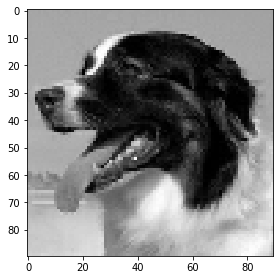

In [355]:
from skimage.color import rgb2gray
img_gray = rgb2gray(image2)
io.imshow(img_gray) 
io.show()

rgb2gray() использует неоднородное смешивание цветовых каналов из-за разной чувствительности человеческого глаза к разным цветам. Следовательно, такое смешивание обеспечивает сохранение яркости от RGB до черно-белого изображения.

In [59]:
rgb2gray(pink_pixel_rgb)

array([[0.56514902]])

Преобразование изображения из черно-белого в RGB осуществляется при помощи gray2rgb() простым дублированием значений серого по трем цветовым каналам.

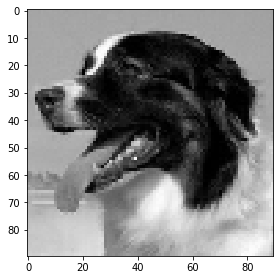

In [405]:
from skimage.color import gray2rgb
img_color = gray2rgb(img_gray)
io.imshow(img_color) 
io.show()

Изображение в негативе также называется дополнительным изображением. Для двоичных изображений значения True становятся False и наоборот. Для черно-белых изображений значения пикселей заменяются разницей между максимальным значением типа данных и фактическим значением. Для изображений RGB одна и та же операция выполняется для каждого канала. Эту операцию можно выполнить с помощью skimage.util.invert().

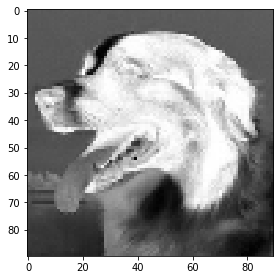

In [357]:
from skimage import util
inverted_img = util.invert(img_color)
io.imshow(inverted_img) 
io.show()

Преобразование изображения RGBA в изображение RGB производится путем альфа-смешивания его с фоном и реализуется с помощью функции rgba2rgb()

C:\Users\Andrew\AppData\Local\Temp/ipykernel_11676/2132907621.py:5: FutureWarning:

Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.



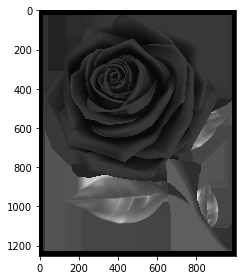

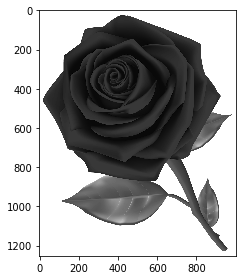

In [247]:
from skimage.color import rgba2rgb
egImage2 = ("https://pngicon.ru/file/uploads/roza-png.png")
img2 = io.imread(egImage2)
# без использования преобразования из RGBA в RGB
img_gray = rgb2gray(img2)
io.imshow(img_gray) 
io.show()
# с использованием преобразования из RGBA в RGB
img_gray = rgb2gray(rgba2rgb(img2))
io.imshow(img_gray) 
io.show()

## Геометрические преобразования изображений

Обрезка изображения может быть выполнена с помощью простых операций нарезки. Ниже мы обрезаем квадрат 50x50, соответствующий левому верхнему углу изображения.

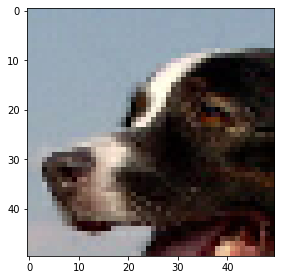

In [358]:
top_left = image2[:50, :50]
io.imshow(top_left) 
io.show()

Чтобы изменить форму изображения, skimage.color предоставляет несколько функций. 
Операция изменения масштаба изменяет размер изображения на заданный коэффициент масштабирования. Коэффициент масштабирования может быть либо одним значением с плавающей запятой, либо несколькими значениями - по одному на каждой оси.

Изменение размера служит той же цели, но позволяет указать форму выходного изображения вместо коэффициента масштабирования

Понижение масштаба служит для уменьшения дискретизации n-мерного изображения с помощью целочисленных коэффициентов с использованием локального среднего для элементов каждого блока коэффициентов размера, заданных в качестве параметра функции.

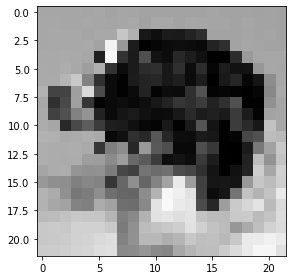

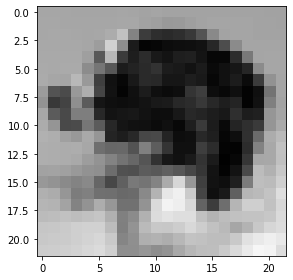

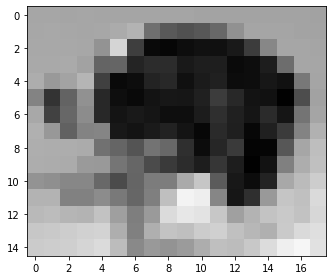

In [359]:
from skimage.transform import rescale, resize, downscale_local_mean
image2 = io.imread(egImage)
image2 = rgb2gray(image2)

image_rescaled = rescale(image2, 0.25, anti_aliasing=False)
io.imshow(image_rescaled) 
io.show()

image_resized = resize(image2, (image2.shape[0] // 4, image2.shape[1] // 4),
                       anti_aliasing=True)
io.imshow(image_resized) 
io.show()

image_downscaled = downscale_local_mean( image2, (6, 5))
io.imshow(image_downscaled) 
io.show()

Проективное преобразование происходит за счет преобразования евклидова пространства, которые сохраняют выравнивание точек. Проективные преобразования могут быть созданы с использованием явных параметров (например, масштаб, сдвиг, поворот и перенос). Преобразования можно применять к изображениям, используя skimage.transform.warp(). 

Евклидово преобразование , называемое также жесткое преобразованием, сохраняет евклидово расстояния между парами точек. Это можно описать как вращение вокруг начала координат с последующим перемещением.

[[  0.96592583  -0.25881905  20.        ]
 [  0.25881905   0.96592583 -20.        ]
 [  0.           0.           1.        ]]


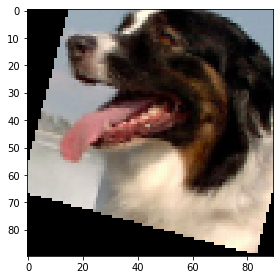

In [302]:
from skimage import img_as_float
from skimage import transform
tform = transform.EuclideanTransform(
   rotation=np.pi / 12.,
   translation = (20, -20)
   )
print(tform.params)
img = img_as_float(image2)
tf_img = transform.warp(img, tform.inverse)
io.imshow(tf_img) 
io.show()

Преобразование подобия сохраняет форму объектов. Он сочетает в себе масштабирование, перемещение и вращение.

[[ 0.48296291 -0.12940952 40.        ]
 [ 0.12940952  0.48296291 40.        ]
 [ 0.          0.          1.        ]]


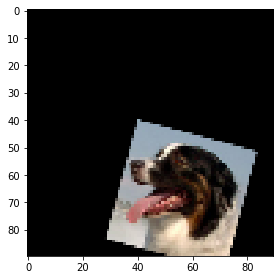

In [303]:
tform = transform.SimilarityTransform(
    scale=0.5,
    rotation=np.pi/12,
    translation=(40, 40))
print(tform.params)
img = img_as_float(image2)
tf_img = transform.warp(image2, tform.inverse)
io.imshow(tf_img) 
io.show()

Аффинное преобразование сохраняет линии (следовательно, выравнивание объектов), а также параллелизм между линиями. Его можно разложить на преобразование подобия и преобразование сдвига.

[[ 1.         -0.34202014  0.        ]
 [ 0.          0.93969262  0.        ]
 [ 0.          0.          1.        ]]


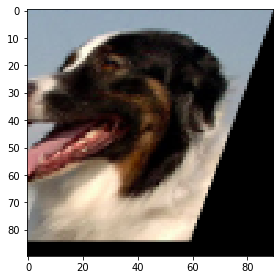

In [310]:
tform = transform.AffineTransform(
        shear=np.pi/9,
        )
print(tform.params)
tf_img = transform.warp(image2, tform.inverse)
io.imshow(tf_img) 
io.show()

Проективное преобразование, сохраняет линию , но не обязательно параллелизм.

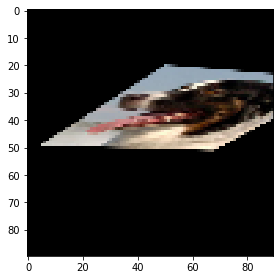

In [319]:
matrix = np.array([[0.9, -0.5, 50],
                   [0.1, 0.4, 20],
                   [0.0015, 0.0015, 1]])
tform = transform.ProjectiveTransform(matrix=matrix)
tf_img = transform.warp(image2, tform.inverse)

io.imshow(tf_img) 
io.show()

## Сегментация изображений

Операторы обнаружения краев используются при обработке изображений в алгоритмах обнаружения кромок. Это операторы дискретного дифференцирования, вычисляющие приближение градиента функции интенсивности изображения. Они могут применятся для эффективной сигментации изображений.

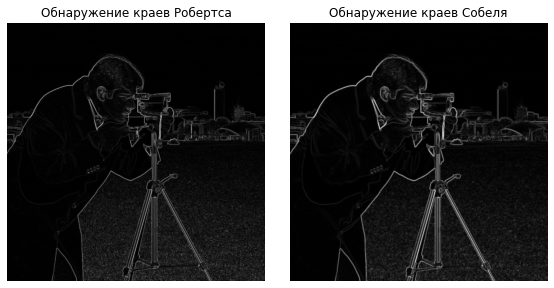

In [361]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import filters
from skimage.data import camera
from skimage.util import compare_images


image = camera()
edge_roberts = filters.roberts(image)
edge_sobel = filters.sobel(image)

fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True,
                         figsize=(8, 4))

axes[0].imshow(edge_roberts, cmap=plt.cm.gray)
axes[0].set_title('Обнаружение краев Робертса')

axes[1].imshow(edge_sobel, cmap=plt.cm.gray)
axes[1].set_title('Обнаружение краев Собеля')

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()

Сегментация изображения - это задача определения пикселей интересующих объектов на изображении.

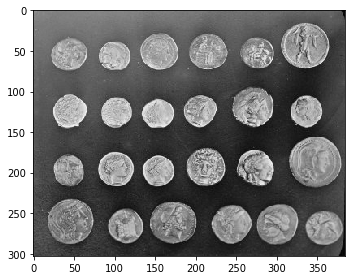

In [236]:
img = data.coins()
io.imshow(img) 
io.show()
# Будем использовать изоражение монет, выделенных на более темном фоне.

Сегментация монет не может быть выполнена непосредственно из гистограммы значений серого при помощи маски, рассмотренной ранее, потому что фон имеет достаточно общих уровней серого с монетами.

Можно попробывать обнаружить края, которые окружают монеты. Для обнаружения края, мы используем "умный" детектор из skimage.feature.canny.

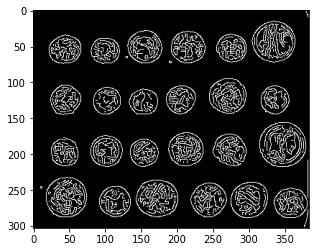

In [184]:
from skimage.feature import canny
edges = canny(coins/255.)
plt.imshow(edges, cmap = cm.gray)
plt.show()
# Поскольку фон очень гладкий, почти все края находятся на границе монет или внутри монет

Теперь, когда у нас есть контуры, очерчивающие внешнюю границу монет, мы заполняем внутреннюю часть монет с помощью ndi.binary_fill_holes функции, которая использует математическую морфологию для заполнения отверстий.

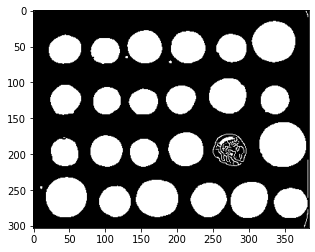

In [185]:
from scipy import ndimage as ndi
fill_coins = ndi.binary_fill_holes(edges)
plt.imshow(fill_coins, cmap = cm.gray)
plt.show()
#Большинство монет хорошо сегментированы вне фона.

Можно сделать вывод, что этот метод сегментации не очень надежен.

Тогда сначала определим маркеры монет и фон. Эти маркеры представляют собой пиксели, которые мы можем однозначно обозначить как объект или фон. Здесь маркеры находятся в двух крайних частях гистограммы значений серого.

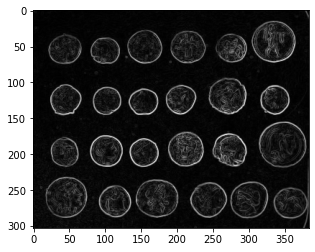

In [363]:
markers = np.zeros_like(coins)
markers[coins < 30] = 1
markers[coins > 150] = 2
# используем оператор Собеля для вычисления амплитуды градиента
from skimage.filters import sobel
elevation_map = sobel(coins)
plt.imshow(elevation_map, cmap = cm.gray)
plt.show()

Следующим шагом будет поиск маркеров фона и монет по крайним частям гистограммы значений серого

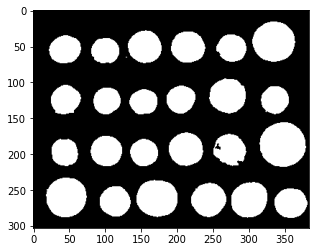

In [265]:
markers = np.zeros_like(coins)
markers[coins < 30] = 1
markers[coins > 150] = 2
# Произведем сигментацию при помощи watershed
from skimage.segmentation import watershed
segmentation = watershed(elevation_map, markers)
plt.imshow(segmentation, cmap = cm.gray)
plt.show()

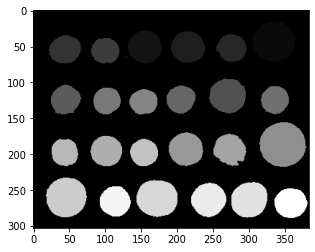

In [266]:
# Удаляем несколько дыр математической морфологии
segmentation = ndi.binary_fill_holes(segmentation - 1)
# Теперь мы можем пометить все монеты одну за другой, используя ndi.label
labeled_coins, _ = ndi.label(segmentation)
plt.imshow(labeled_coins, cmap = cm.gray)
plt.show()

У различных преобразований skimage.transform есть estimate метод оценки параметров преобразования из двух наборов точек (исходной и конечной).

Можно оценить параметры геометрического преобразования с помощью метода наименьших квадратов.

Это может, среди прочего, использоваться для регистрации или исправления изображений, когда есть набор контрольных точек точек на двух изображениях.

Предположим, мы хотим распознать буквы на фотографии, сделанной не спереди, а под определенным углом. В простейшем случае плоской бумажной поверхности буквы проективно искажены. Простые алгоритмы сопоставления не смогут сопоставить такие символы. Одним из решений этой проблемы было бы исказить изображение, чтобы удалить искажение, а затем применить алгоритм сопоставления.

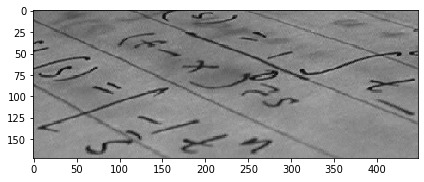

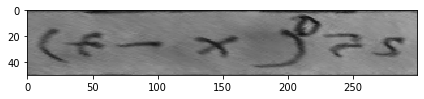

In [365]:
text = data.text()

src = np.array([[0, 0], [0, 50], [300, 50], [300, 0]])
dst = np.array([[155, 15], [65, 40], [260, 130], [360, 95]])

tform3 = transform.ProjectiveTransform()
tform3.estimate(src, dst)
warped = transform.warp(text, tform3, output_shape=(50, 300))

io.imshow(text) 
io.show()

io.imshow(warped) 
io.show()

Исходные и конечные точки могут быть определены вручную или с использованием различных методов обнаружения функций, доступных в skimage.feature

 ### Энтропийный фильтр

Для изображения локальная энтропия связана со сложностью, содержащейся в данной окрестности, обычно определяемой элементами окружения. Энтропийный фильтр может обнаруживать незначительные изменения в локальном распределении уровней серого. Пример показывает, как обнаружить текстуру в изображении камеры с помощью меньшего элемента структурирования.

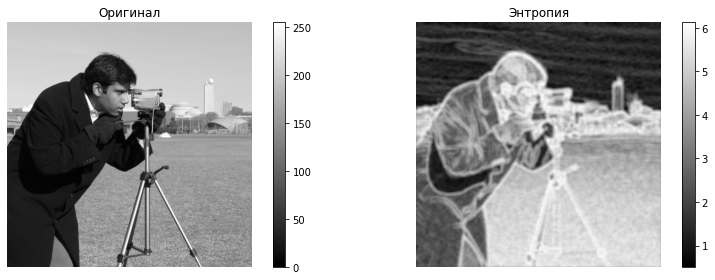

In [364]:
from skimage.filters.rank import entropy
from skimage.morphology import disk
image = img_as_ubyte(data.camera())

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(12, 4),
                               sharex=True, sharey=True)

img0 = ax0.imshow(image, cmap=plt.cm.gray)
ax0.set_title("Оригинал")
ax0.axis("off")
fig.colorbar(img0, ax=ax0)

img1 = ax1.imshow(entropy(image, disk(5)), cmap='gray')
ax1.set_title("Энтропия")
ax1.axis("off")
fig.colorbar(img1, ax=ax1)

fig.tight_layout()

plt.show()

### Определение контуров изображения

Для начала разберем алгоритм Marching squares, чтобы найти контуры с постоянным знаком на изображении. В skimage.measure.find_contours, значения массива линейно интерполируются, чтобы обеспечить лучшую точность выходных контуров. Контуры, пересекающие край изображения, открыты; все остальные закрыты.

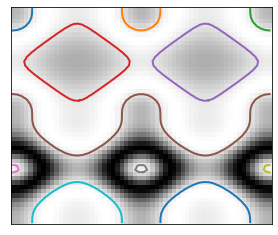

In [387]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import measure


# Создание тестовых данных
x, y = np.ogrid[-np.pi:np.pi:50j, -np.pi:np.pi:60j]
r = np.sin(np.exp((np.sin(x)**3 + np.cos(y)**2)))

# Поиск контуров с постоянным значением 0,8
contours = measure.find_contours(r, 0.8)

fig, ax = plt.subplots()
ax.imshow(r, cmap=plt.cm.gray)

for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

Модель активного контура - это метод подгонки открытых или замкнутых сплаймов к линиям или краям изображения. В следующем примере используется активная контурная модель для отделения лица человека от остальной части изображения путем подгонки замкнутой кривой к краям лица. Мы инициализируем круг вокруг лица и используем граничное условие boundary_condition='periodic'по умолчанию, чтобы соответствовать замкнутой кривой. Параметры по умолчанию заставят кривую искать по краям.

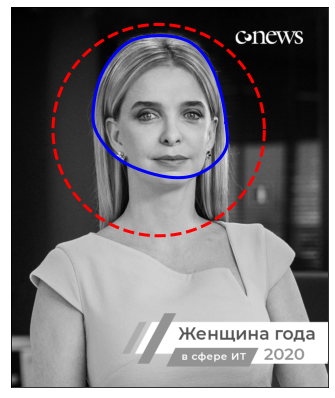

In [404]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour

egImaget = ("https://filearchive.cnews.ru/img/cnews/2020/03/06/02%20bocharnikova.jpg")
img = io.imread(egImaget)



img = rgb2gray(img)

s = np.linspace(0, 2*np.pi, 400)
r = 350 + 300*np.sin(s)
c = 420 + 300*np.cos(s)
init = np.array([r, c]).T

snake = active_contour(gaussian(img, 3),
                       init, alpha=0.015, beta=10, gamma=0.001)

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])

plt.show()

### Сопоставление гистограм

Этот пример демонстрирует функцию сопоставления гистограмм. Он манипулирует пикселями входного изображения так, чтобы его гистограмма соответствовала гистограмме эталонного изображения. Если изображения имеют несколько каналов, сопоставление выполняется независимо для каждого канала, если количество каналов равно во входном изображении и эталонном изображении.

Сопоставление гистограммы можно использовать в качестве упрощенной нормализации для обработки изображений, например сопоставления признаков, особенно в обстоятельствах, когда изображения были взяты из разных источников или в разных условиях (например, при освещении).

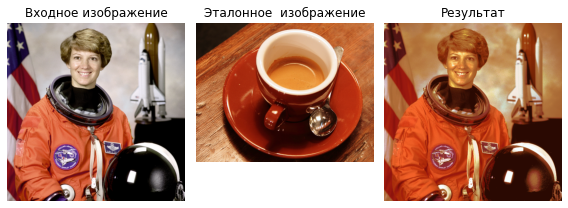

In [366]:
import matplotlib.pyplot as plt

from skimage import data
from skimage import exposure
from skimage.exposure import match_histograms

reference = data.coffee()
image = data.astronaut()

matched = match_histograms(image, reference, multichannel=True)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3),
                                    sharex=True, sharey=True)
for aa in (ax1, ax2, ax3):
    aa.set_axis_off()

ax1.imshow(image)
ax1.set_title('Входное изображение')
ax2.imshow(reference)
ax2.set_title('Эталонное  изображение')
ax3.imshow(matched)
ax3.set_title('Результат')

plt.tight_layout()
plt.show()

### Отделение объектов от фона. 

Пороговое значение используется для создания двоичного изображения из черно-белого изображения. Это самый простой способ отделить объекты от фона.

В этом примере используется среднее значение яркости пикселей. Это простое пороговое значение, которое иногда используется как предположительное значение.

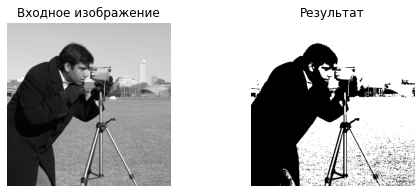

In [367]:
from skimage.filters import threshold_mean


image = data.camera()
thresh = threshold_mean(image)
binary = image > thresh

fig, axes = plt.subplots(ncols=2, figsize=(8, 3))
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Входное изображение')

ax[1].imshow(binary, cmap=plt.cm.gray)
ax[1].set_title('Результат')

for a in ax:
    a.axis('off')

plt.show()

### Заливка

Заливка - это алгоритм для идентификации и/или изменения соседних значений в изображении на основе их сходства с начальной начальной точкой. В данном примере мы заполним квадрат посередине значением 127, начиная с индекса (76, 76), для этого используем функцию flood_fill(), которая обнаруживает точки, а затем устанавливает для них новое значение.

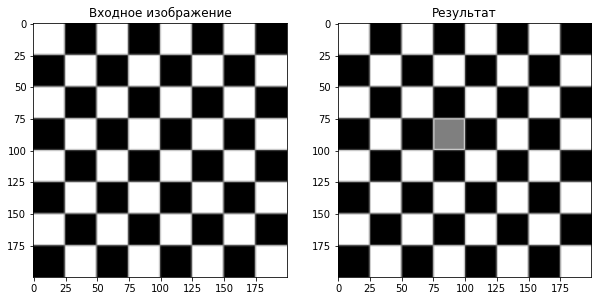

In [372]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, filters, color, morphology
from skimage.segmentation import flood, flood_fill


checkers = data.checkerboard()


filled_checkers = flood_fill(checkers, (76, 76), 127)

fig, ax = plt.subplots(ncols=2, figsize=(10, 5))

ax[0].imshow(checkers, cmap=plt.cm.gray)
ax[0].set_title('Входное изображение')

ax[1].imshow(filled_checkers, cmap=plt.cm.gray)
ax[1].set_title('Результат')

plt.show()

### Фильтрация

В этом примере мы отфильтровываем черно-белое изображенние, используя медианный фильтр, доступный в skimage. К изображению добавляется некоторый шум: для 1% пикселей случайным образом устанавливается значение 255, для 1% случайным образом устанавливается значение 0.

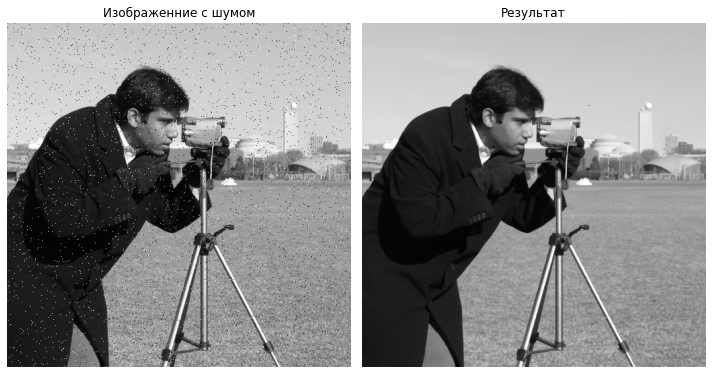

In [406]:
from skimage.filters.rank import median
from skimage.morphology import disk, ball
noisy_image = img_as_ubyte(data.camera())
noise = np.random.random(noisy_image.shape)
noisy_image = img_as_ubyte(data.camera())
noisy_image[noise > 0.99] = 255
noisy_image[noise < 0.01] = 0

fig, axes = plt.subplots(1, 2, figsize=(10, 10), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(noisy_image, vmin=0, vmax=255, cmap=plt.cm.gray)
ax[0].set_title('Изображенние с шумом')

ax[1].imshow(median(noisy_image, disk(1)), vmin=0, vmax=255, cmap=plt.cm.gray)
ax[1].set_title('Результат')


for a in ax:
    a.axis('off')

plt.tight_layout()